In [87]:
#importing all header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt

In [88]:
#Reading of data
df=pd.read_csv("test.csv")
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [89]:
#Renameing some column
df=df.rename(columns={"Severity of Illness": "Severity_of_Illness", "Type of Admission": "Type_of_Admission"})

In [90]:
#info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [91]:
#describtion of dataFame
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,4.758692,3.192686,2.634489,65877.903515,7.243996,3.284531,4869.731097
std,39565.092259,8.634694,3.102245,1.164250,0.869295,37942.997623,4.790625,1.777270,1080.766723
min,318439.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1800.000000
25%,352703.000000,11.000000,2.000000,2.000000,2.000000,32945.000000,4.000000,2.000000,4178.000000
50%,386967.000000,19.000000,5.000000,3.000000,3.000000,65786.000000,8.000000,3.000000,4731.000000
75%,421231.000000,26.000000,7.000000,4.000000,3.000000,98851.000000,8.000000,4.000000,5398.000000
max,455495.000000,32.000000,13.000000,21.000000,4.000000,131618.000000,38.000000,32.000000,11920.000000


In [92]:
#all the columns with number of unique values
columns=list(df.columns)
columns
unique=[]
for col in columns:
    uni=df[col].nunique()
    unique.append(uni)
    print(col,uni)

case_id 137057
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 15
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 39607
City_Code_Patient 37
Type_of_Admission 3
Severity_of_Illness 3
Visitors with Patient 27
Age 10
Admission_Deposit 6609


Now we will drop the patientid and case_id  beacuse it will overfit the data

In [93]:
df=df.drop(["patientid","case_id"],axis=1)

now we will do label encoding or hotencoding so the text of depatmrnt, Type of Admission,Severity of Illness, and age is properly acccounted 

In [94]:
df.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
City_Code_Patient                    2157
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

below I have made a list of indexes where the bed grade is null 
then i have taken hospital code of thw insex 
and at last i have taken the unique value

In [95]:
list_null=[]
null_bg=list(df["Bed Grade"].isnull())
for i in range(0,len(null_bg)):
    if(null_bg[i]==True):
        list_null.append(i)#helps us finding the plac4
df_null=df.iloc[null_bg]
hos_code=df_null["Hospital_code"]
hos_code.unique()#unique 

array([6, 7])

from the below code we can see the hospital code 6 has bed Grade 

In [96]:
list_=[]
list_code=list(df["Hospital_code"])
for i in range(0,len(list_code)):
    if(list_code[i]==6):
        list_.append(i)
df.iloc[3]

Hospital_code                                 6
Hospital_type_code                            a
City_Code_Hospital                            6
Hospital_region_code                          X
Available Extra Rooms in Hospital             3
Department                           gynecology
Ward_Type                                     Q
Ward_Facility_Code                            F
Bed Grade                                     2
City_Code_Patient                             2
Type_of_Admission                        Trauma
Severity_of_Illness                    Moderate
Visitors with Patient                         3
Age                                       71-80
Admission_Deposit                          4173
Name: 3, dtype: object

In [97]:
list_7=[]
list_code7=list(df["Hospital_code"])
for i in range(0,len(list_code7)):
    if(list_code7[i]==7):
        list_7.append(i)
df.iloc[233]

Hospital_code                                 7
Hospital_type_code                            a
City_Code_Hospital                            4
Hospital_region_code                          X
Available Extra Rooms in Hospital             3
Department                           gynecology
Ward_Type                                     R
Ward_Facility_Code                            F
Bed Grade                                     2
City_Code_Patient                             5
Type_of_Admission                        Trauma
Severity_of_Illness                    Moderate
Visitors with Patient                         2
Age                                       51-60
Admission_Deposit                          5511
Name: 233, dtype: object

bed grade of hospital code 7= 2
bed grade of hospital code 6= 2

In [98]:
df["Bed Grade"]=df["Bed Grade"].fillna(2)
df["City_Code_Patient"]=df["City_Code_Patient"].fillna(df["City_Code_Patient"].mode()[0])
df.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [99]:
df["Bed Grade"]=df["Bed Grade"].astype("category")
df["City_Code_Patient"]=df["City_Code_Patient"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Hospital_code                      137057 non-null  int64   
 1   Hospital_type_code                 137057 non-null  object  
 2   City_Code_Hospital                 137057 non-null  int64   
 3   Hospital_region_code               137057 non-null  object  
 4   Available Extra Rooms in Hospital  137057 non-null  int64   
 5   Department                         137057 non-null  object  
 6   Ward_Type                          137057 non-null  object  
 7   Ward_Facility_Code                 137057 non-null  object  
 8   Bed Grade                          137057 non-null  category
 9   City_Code_Patient                  137057 non-null  int64   
 10  Type_of_Admission                  137057 non-null  object  
 11  Severity_of_Illness       

In [100]:
#lable encoding of age
Age_ordinal={ "0-10":0,
              '11-20':1,
              '21-30':2, 
              '31-40':3, 
              '41-50':4,
              '51-60':5,
              '61-70':6,
              '71-80':7,
              '81-90':8,
              '91-100':9,
}
df["Age"]=df.Age.map(Age_ordinal)
df["Age"]=df["Age"].astype("category")

In [101]:
#lable encoding of severity
Severity={"Moderate":0,
          "Extreme":1,
          "Minor":2,
}
df["Severity_of_Illness"]=df.Severity_of_Illness.map((Severity))
df["Severity_of_Illness"]=df["Severity_of_Illness"].astype("category")

In [102]:
#lable encoding of age Department
department={'gynecology':0,
            'anesthesia':1,
            'TB & Chest disease':2,
            'radiotherapy':3,
            'surgery':4
           }
df["Department"]=df.Department.map(department)
df["Department"]=df["Department"].astype("category")

In [103]:
#lable encoding of addmission
addmission={'Emergency':1,
           'Trauma':2,
            'Urgent':0
}
df["Type_of_Admission"]=df.Type_of_Admission.map(addmission)
df["Type_of_Admission"]=df["Type_of_Admission"].astype("category")

visualixation of test data for categorty/obeject we will chose bar plot and for int we will choose hist

(array([ 2886.,  7103., 17717., 26781., 27746., 20992., 14932., 14945.,
         3350.,   605.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

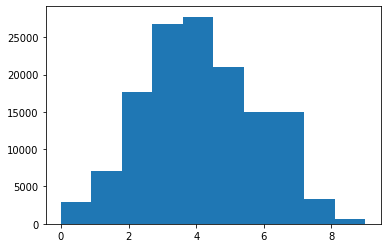

In [104]:
plt.hist(df["Age"])

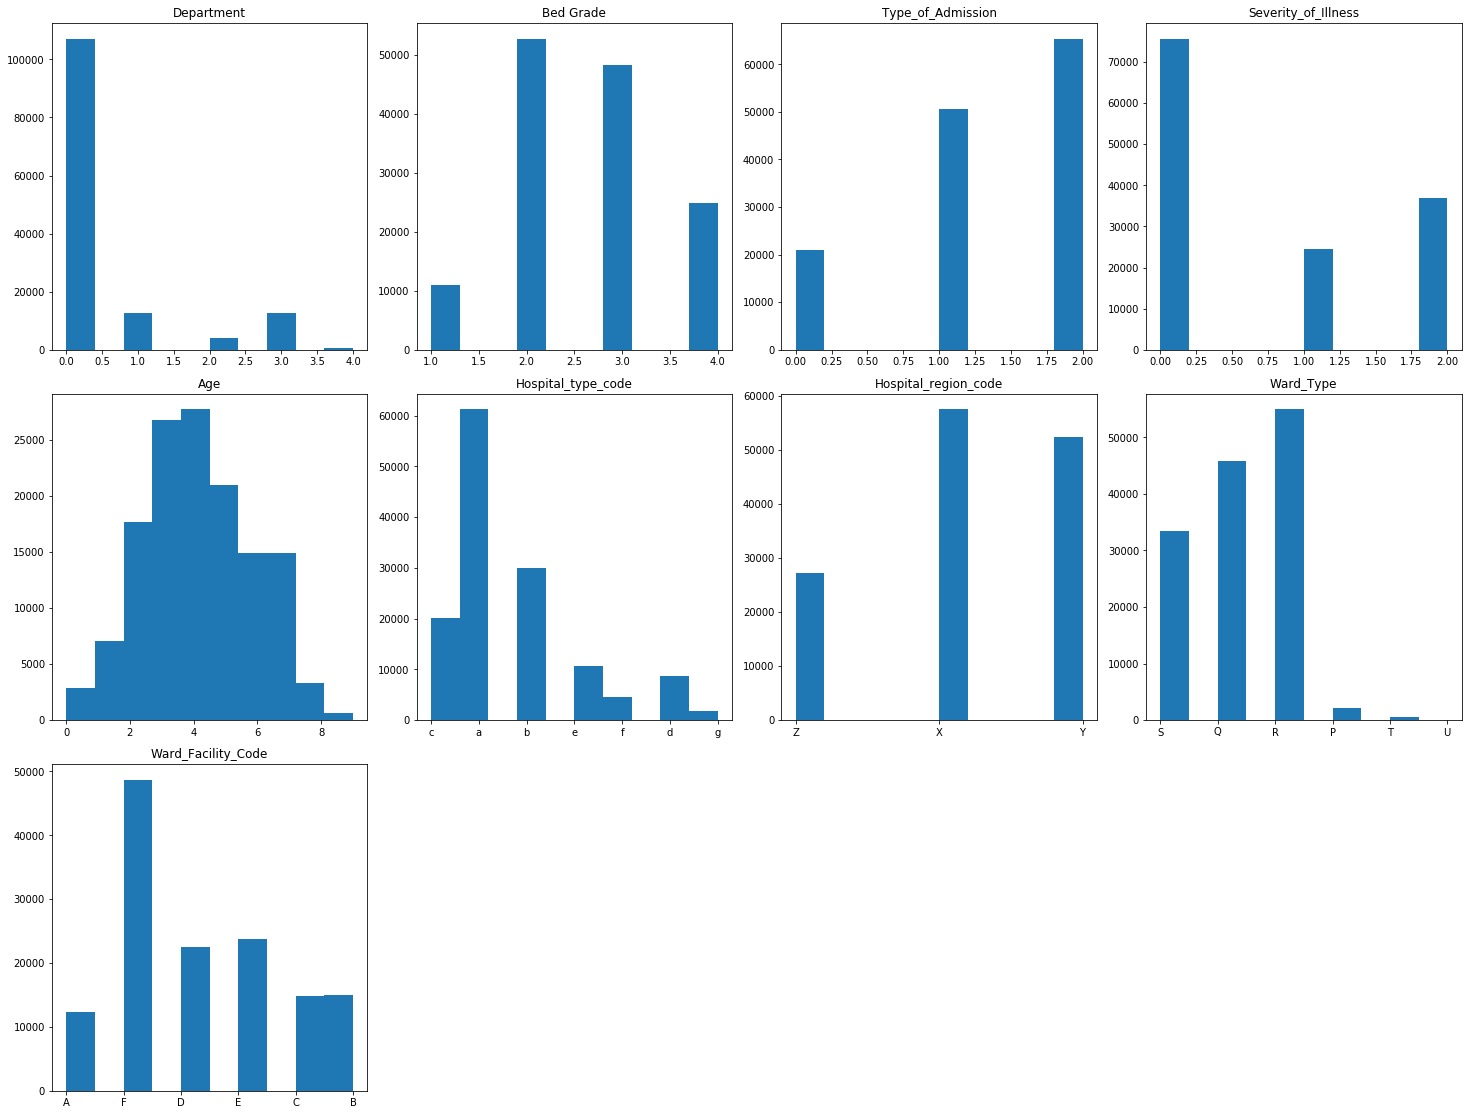

In [118]:
category_train=df.columns[df.dtypes=="category"].tolist()
object_train=df.columns[df.dtypes==object].tolist()
category_train=category_train+object_train
cg_features = list(df[category_train].columns)
sp=1
for columns in cg_features:
    plt.subplot(4,4,sp)
    plt.title(columns)
    plt.hist(df[columns])  
    sp+=1
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.tight_layout()

In [106]:
df.to_csv("/home/akaul/Desktop/hackthon/Train_hMYJ020/df_test.csv",index=False)
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors with Patient,Age,Admission_Deposit
0,21,c,3,Z,3,0,S,A,2.0,2,1,0,2,7,3095.0
1,29,a,4,X,2,0,S,F,2.0,2,2,0,4,7,4018.0
2,26,b,2,Y,3,0,Q,D,4.0,2,1,0,3,7,4492.0
3,6,a,6,X,3,0,Q,F,2.0,2,2,0,3,7,4173.0
4,28,b,11,X,2,0,R,F,2.0,2,2,0,4,7,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,1,Q,D,3.0,3,1,2,4,4,6313.0
137053,25,e,1,X,2,3,R,E,4.0,7,1,0,2,0,3510.0
137054,30,c,3,Z,2,1,R,A,4.0,12,0,2,2,0,7190.0
137055,5,a,1,X,2,1,R,E,4.0,10,2,2,2,4,5435.0
